# **Trabalho Final**
### Algoritmos e Programação com Linguagem Python
---

**Orientações Gerais:**

* Esta é o trabalho final prático onde serão trabalhados conceitos 
apresentados e exercitados em sala de aula.

* Aspéctos como clareza e organização do código, comentários, raciocínio lógico, coerência no nome de variáveis, utilização das estruturas mais adequadas para a solução dos problemas e o funcionamento adequado serão analisados e irão compor o valor da nota final.

* Procure entender exatamente o que se pede antes de iniciar a codificação. Quando se sabe o que é necessário fazer, a codificação fica mais fácil, mais eficiente e mais divertida ;-).

* Faça o upload do notebook completo nomeado da seguinte forma: *nome_sobrenome_RA.ipynb*. 

* No caso de grupos, informar ao professor os membros de cada grupo e cada um deverá importar o arquivo no Canvas individualmente.

* Arquivos com nomes incorretos serão desconsiderados!

* Não deixem dúvidas para trás! Acessem os grupos combinados ou entrem em contato com o professor. 

✌ Sucesso o/






# RMS Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte matando mais de 1500 pessoas, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------

A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

O arquivo **titanic_data.csv** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias do acidente.

Efetue a carga do arquivo através da biblioteca _Pandas_ e a partir do _DataFrame_ gerado, efetue as operações necessárias para responder as questões.


## Importando o DataSet

1 - Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit, levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
caminhoArquivo = "/content/drive/MyDrive/Facens/Trabalho Final/titanic_data.csv" 
tit = pd.read_csv(caminhoArquivo, encoding='utf8')

## Conhecendo o DataSet

2 - Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?

In [100]:
print(f'O dataset possui {tit.shape[0]} linhas e {tit.shape[1]} colunas\n')

for column in tit:
  print(f'O tipo da coluna {column} é: {tit[column].dtype}')

O dataset possui 891 linhas e 12 colunas

O tipo da coluna PassengerId é: int64
O tipo da coluna Survived é: int64
O tipo da coluna Pclass é: int64
O tipo da coluna Name é: object
O tipo da coluna Sex é: object
O tipo da coluna Age é: float64
O tipo da coluna SibSp é: int64
O tipo da coluna Parch é: int64
O tipo da coluna Ticket é: object
O tipo da coluna Fare é: float64
O tipo da coluna Cabin é: object
O tipo da coluna Embarked é: object


3 - Mostre os dados dos dez primeiros e 8 últimos registros do dataset.

In [101]:
pd.concat([tit.iloc[0:10,:], tit.iloc[-8:,:]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


4 - Cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. É possível afirmar se há dados faltantes no dataset? Caso positivo, quais e quantos seriam esses dados? Preencha os dados faltantes de forma que não influenciem em operações futuras.

In [102]:
# Pega colunas com valores nulos
nullColumns = tit.columns[tit.isnull().any()].tolist()
# Pega valores nulos em si
nullValues = tit.isnull().sum()[tit.isnull().sum()>0].astype(str).tolist()
# Contagem de colunas nulas
countNullColumns = len(nullColumns)
# Gambiarra para formatar o valor de texto
nullColumns.insert(-1, 'e')
nullValues.insert(-1, 'e')
nullColumns = ', '.join(nullColumns).replace(', e, ', ' e ')
nullValues = ', '.join(nullValues).replace(', e, ', ' e ')
# Resposta
print(f"Através do comando 'isnull', vemos que há {countNullColumns} colunas com pelo menos um campo nulo: {nullColumns}. Sendo a quantidade de nulos, respectivamente: {nullValues}")

Através do comando 'isnull', vemos que há 3 colunas com pelo menos um campo nulo: Age, Cabin e Embarked. Sendo a quantidade de nulos, respectivamente: 177, 687 e 2


In [103]:
print("Uma técnica para preenchimento de valores nulos em colunas numéricas seria utilizar a média de todos os valores, e para colunas categóricas utilizar o valor que mais se repete. \nPor mais que seja uma forma grosseira e, não tão cuidadosa de lidar com os dados, à princpício seguiremos assim.")

Uma técnica para preenchimento de valores nulos em colunas numéricas seria utilizar a média de todos os valores, e para colunas categóricas utilizar o valor que mais se repete. 
Por mais que seja uma forma grosseira e, não tão cuidadosa de lidar com os dados, à princpício seguiremos assim.


In [104]:
# Utilizando o valor médio para preenchimento da coluna 'Age':
tit['Age'] = tit['Age'].fillna(tit['Age'].mode()[0])
# print(tit['Age'].isnull().sum())

In [105]:
# Utilizando o valor que mais se repete para preenchimento da coluna 'Embarked':
tit['Embarked'] = tit['Embarked'].fillna(tit['Embarked'].mode()[0])
# tit['Embarked'].isnull().sum()

In [106]:
print("Com relação à coluna 'Cabin', por ser algo mais individual, não seria interessante utilizar de medidas estatísticas para o preenchimento.\n Portanto, vamos simplesmente utilizar o valor 'Outros' para a cabine.")
# Utilizando o valor 'Outros' para preencher a coluna de cabine
tit['Cabin'] = tit['Cabin'].fillna('Outros')
# tit['Cabin'].isnull().sum()

Com relação à coluna 'Cabin', por ser algo mais individual, não seria interessante utilizar de medidas estatísticas para o preenchimento.
 Portanto, vamos simplesmente utilizar o valor 'Outros' para a cabine.


## Adequando o DataSet

5 - Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise. Assim, exclua do dataset as colunas Sibsp, Parch e Ticket.

In [107]:
tit.drop(['SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

6 - Renomear as colunas restantes para a lingua portuguesa, utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade, Tarifa, Cabine e Embarque.

In [108]:
oldNames = tit.columns.values
newNames = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'Tarifa', 'Cabine', 'Embarque']
changeNames = {}
for i in range(len(newNames)):
  changeNames[oldNames[i]] = newNames[i]
tit.rename(columns=changeNames, inplace=True)

7 - Alterar o conteudo da coluna Sobreviveu para:
- 0 => Não
- 1 => Sim

In [109]:
tit['Sobreviveu'] = tit['Sobreviveu'].replace(to_replace=[0,1],
                              value=["Não", "Sim"])

8 - Alterar o conteudo da coluna Sexo para:
- female => Mulher
- male   => Homem

In [110]:
tit['Sexo'] = tit['Sexo'].replace(to_replace=["female","male"],
                              value=["Mulher", "Homem"])

## Alguns números

9 - Quantas mulheres e quantos homems estavam à bordo, de acordo com o dataset?

In [111]:
countPassengers = tit[['IdPassageiro', 'Sexo']].groupby('Sexo', as_index=False).count()
countPassengers.rename(columns={'IdPassageiro': 'Nº de Passageiros'}, inplace=True)
countPassengers

,Sexo,Nº de Passageiros
0,Homem,577
1,Mulher,314


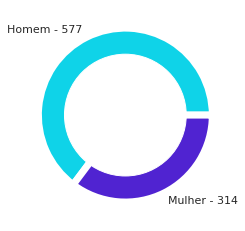

In [112]:
# Create a circle at the center of the plot
donut = plt.Circle((0,0), 0.7, color='white')

lbl = [x + " - " + str(y) for x, y in zip(countPassengers['Sexo'].to_list(), countPassengers['Nº de Passageiros'].to_list())]
plt.pie(countPassengers['Nº de Passageiros'], labels=lbl, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#0FD3E8', '#5023D1'])
p = plt.gcf()
p.gca().add_artist(donut)
plt.show()

10 - Quantos passageiros sobreviveram e quantos não sobreviveram?

In [113]:
countSurvivors = tit[tit['Sobreviveu'] == 'Sim']
print(f'{countSurvivors.shape[0]} passageiros sobreviveram e {tit.shape[0] - countSurvivors.shape[0]} não sobreviveram')

342 passageiros sobreviveram e 549 não sobreviveram


11 - Quantas mulheres não sobreviveram?

In [114]:
countDeadWomen = tit[(tit['Sexo'] == 'Mulher') & (tit['Sobreviveu'] == 'Não')]
print(f'{countDeadWomen.shape[0]} mulheres não sobreviveram')

81 mulheres não sobreviveram


12 - Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções.

In [115]:
# Pega valores totais
total = tit.shape[0]
totalSurvivors = tit[tit['Sobreviveu'] == 'Sim'].shape[0]

# Contagem do número de homens e mulheres
countPassengers = tit[['IdPassageiro', 'Sexo']].groupby('Sexo', as_index=False).count()
countPassengers.rename(columns={'IdPassageiro': 'Passageiros'}, inplace=True)

# contagem dos sobreviventes homens e mulheres
countSurvivors1 = tit[['IdPassageiro', 'Sexo']][tit['Sobreviveu'] == 'Sim'].groupby('Sexo', as_index=False).count()
countSurvivors1.rename(columns={'IdPassageiro': 'Sobreviventes'}, inplace=True)

# contagem dos não sobreviventes homens e mulheres
countSurvivors2 = tit[['IdPassageiro', 'Sexo']][tit['Sobreviveu'] == 'Não'].groupby('Sexo', as_index=False).count()
countSurvivors2.rename(columns={'IdPassageiro': 'Não Sobreviventes'}, inplace=True)

# União dos dataframes
countSurvivors = pd.merge(countSurvivors1, countSurvivors2, how='left', on='Sexo').set_index('Sexo')
countPassengers = pd.merge(countPassengers, countSurvivors, how='left', on='Sexo').set_index('Sexo')

# Contagem do número de homens e mulheres em percentual
countPassengers['Passageiros (%)'] = round(countPassengers['Passageiros']*100/total, 0)

# contagem dos sobreviventes homens e mulheres em percentual
countPassengers['Sobreviventes (%)'] = round(countPassengers['Sobreviventes']*100/totalSurvivors, 0)

# Adicionar coluna de total
countPassengers.loc['Totais'] = countPassengers.sum(numeric_only=True, axis=0)

#print
countPassengers.reset_index()

,Sexo,Passageiros,Sobreviventes,Não Sobreviventes,Passageiros (%),Sobreviventes (%)
0,Homem,577.0,109.0,468.0,65.0,32.0
1,Mulher,314.0,233.0,81.0,35.0,68.0
2,Totais,891.0,342.0,549.0,100.0,100.0


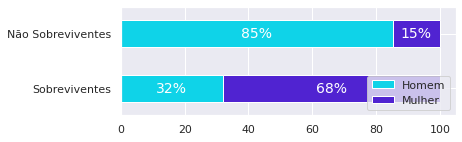

In [116]:
# Criação de um dataframe com Transpose
df_chart = countPassengers[0:2][['Sobreviventes', 'Não Sobreviventes']]
df_chart = df_chart.transpose()

# Passagem dos valores para percentual
countPassengers_total = df_chart["Homem"] + df_chart["Mulher"]
countPassengers_rel = df_chart[df_chart.columns].div(countPassengers_total, 0)*100

# Lista de cores
colors=['#0FD3E8', '#5023D1']
font_color = '#525252'

# Criação do plot
ax = countPassengers_rel.iloc[:, 0:4].plot.barh(align='center', stacked=True, figsize=(6, 2), color=colors)

plt.legend(loc=4)

# Loop par adicionar os valores
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=14)

In [117]:
print("\nMesmo que o número de passageiros homens tenha sido proporcionalmente maior, devido à política de resgate de mulheres e crianças primeiro, o número de sobreviventes homens foi menor. ")


Mesmo que o número de passageiros homens tenha sido proporcionalmente maior, devido à política de resgate de mulheres e crianças primeiro, o número de sobreviventes homens foi menor. 


13 - Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?

In [118]:
# Novo dataframe com filtro
countAge = tit[['IdPassageiro', 'Idade', 'Sobreviveu']][tit['Sobreviveu'] == 'Não']
# Group by para idade
countAge = countAge[['IdPassageiro', 'Idade']].groupby('Idade').count()
# Renomear as colunas
countAge.rename(columns={'IdPassageiro': 'Sobreviventes'}, inplace=True)
# Número máximo de mortes
numDeaths = countAge['Sobreviventes'].max()
# Número da idade correspondente ao máximo de mortes
ageDeaths = countAge[countAge['Sobreviventes'] == numDeaths].index.values[0]

print(f'A idade em comum com o maior número de mortes foi {ageDeaths} anos, com o total de {numDeaths} pessoas.')

A idade em comum com o maior número de mortes foi 24.0 anos, com o total de 140 pessoas.


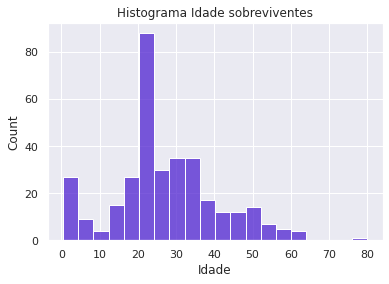

Média: 28.0
Mediana: 25.0
Moda: 24.0


In [119]:
# Criação do plot
sns.set(style="darkgrid")
df = tit[['IdPassageiro','Idade']][tit['Sobreviveu'] == 'Sim']
sns.histplot(data=df, x="Idade", bins=20, color='#5023D1')
plt.title('Histograma Idade sobreviventes')
plt.show()

# Indicadores estatísticos
media = df['Idade'].mean()
mediana = df['Idade'].median()
moda = df['Idade'].mode()[0]
print(f'Média: {round(media,0)}')
print(f'Mediana: {round(mediana,0)}')
print(f'Moda: {round(moda, 0)}')

14 - Qual a média de idade dos homens sobreviventes?

In [120]:
# Criação de um novo dataframe
df = tit[(tit['Sexo'] == 'Homem') & (tit['Sobreviveu'] == 'Sim')]
# Média de idade
avgAge = round(df['Idade'].mean(), 1)
# Resposta
print(f'A média de idade dos homens sobreviventes é de {avgAge} anos')

A média de idade dos homens sobreviventes é de 26.8 anos


15 - Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo) qual a proporção de sobreviventes por sexo?

In [121]:
# Define novos dataframes
dfPriori1 = tit[['IdPassageiro', 'Sexo', 'Idade', 'Sobreviveu']][(tit['Sexo'] == 'Mulher') | (tit['Idade'] <= 15)]
dfPriori1 = dfPriori1[dfPriori1['Sobreviveu'] == 'Sim']
dfPriori2 = tit[['IdPassageiro', 'Sexo', 'Idade', 'Sobreviveu']][(tit['Sexo'] == 'Mulher') | (tit['Idade'] <= 15)]
totalSurvivors = dfPriori1[['IdPassageiro']].count()

# Dataframe com sobreviventes
countPriori1 = dfPriori1[['IdPassageiro', 'Sexo']].groupby(['Sexo']).count()
countPriori1.rename(columns={'IdPassageiro': 'Sobreviventes'}, inplace=True)

# Dataframe com totais
countPriori2 = dfPriori2[['IdPassageiro', 'Sexo']].groupby(['Sexo']).count()
countPriori2.rename(columns={'IdPassageiro': 'Total'}, inplace=True)

# União dos dataframes
countPriori = pd.merge(countPriori1, countPriori2, how='left', on=['Sexo'])

# Coluna de percentual
countPriori['Sobreviventes por Grupo (%)'] = round(100*countPriori['Sobreviventes']/ countPriori['Total'], 0)

# Coluna de total geral
countPriori['Total Geral'] = list(totalSurvivors)*2

# Coluna de percentual geral
countPriori['Sobreviventes Geral (%)'] = round(100*countPriori['Sobreviventes']/ countPriori['Total Geral'], 0)

#print
countPriori = countPriori.reset_index()

# Resposta 1
for linha in countPriori.iterrows():
  print(f'Dentre o grupo de {linha[1][0]} a proporção de sobreviventes foi de {linha[1][3]}%')

# Resposta 2
men = countPriori['Sobreviventes Geral (%)'].to_list()[0]
women = countPriori['Sobreviventes Geral (%)'].to_list()[1]
print(f'Dentre os sobreviventes, {men}% foram de homens e {women}% foram de mulheres')

Dentre o grupo de Homem a proporção de sobreviventes foi de 52.0%
Dentre o grupo de Mulher a proporção de sobreviventes foi de 74.0%
Dentre os sobreviventes, 8.0% foram de homens e 92.0% foram de mulheres


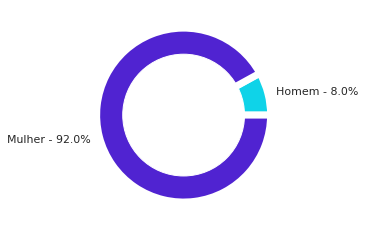

In [122]:
# Pega um pedaço do dataset
countPriori = countPriori[['Sexo', 'Sobreviventes Geral (%)']]
# Transforma os dados para percentual
countPriori_rel = df_chart[df_chart.columns].div(countPassengers_total, 0)*100
# Cria um círculo no centro do plot
donut = plt.Circle((0,0), 0.7, color='white')

# List comprehension para mostrar os dados
lbl = [x + " - " + str(y) + "%" for x, y in zip(countPriori['Sexo'].to_list(), countPriori['Sobreviventes Geral (%)'].to_list())]

# Criação do plot
plt.pie(countPriori['Sobreviventes Geral (%)'], labels=lbl, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#0FD3E8', '#5023D1'])
p = plt.gcf()
p.gca().add_artist(donut)
plt.show()

16 - Qual a quantidade de passageiros por classe?

In [123]:
# Groupby por Classe e contagem de dados
countClass = tit[['IdPassageiro', 'Classe']].groupby('Classe', as_index=False).count()
# Renomear as colunas
countClass.rename(columns={'IdPassageiro': 'Nº de Passageiros'}, inplace=True)
# Resetar o index
countClass = countClass.set_index('Classe')

# Resposta
for linha in countClass.iterrows():
  print(f'Para a classe {linha[0]} houveram {linha[1][0]} passageiros') 

Para a classe 1 houveram 216 passageiros
Para a classe 2 houveram 184 passageiros
Para a classe 3 houveram 491 passageiros


17 - Qual o percentual de sobreviventes por classe?

In [124]:
# Filtro do dataset
countClass = tit[tit['Sobreviveu'] == 'Sim']

# Pega valores totais
totalClasse = countClass.shape[0]
countClass = countClass[['IdPassageiro', 'Classe']].groupby('Classe', as_index=False).count()
countClass.rename(columns={'IdPassageiro': 'Nº de Passageiros'}, inplace=True)
countClass = countClass.set_index('Classe')

# contagem dos sobreviventes em percentual
countClass['Sobreviventes (%)'] = round(countClass['Nº de Passageiros']*100/totalClasse, 0)

for linha in countClass.iterrows():
  print(f'Para a classe {linha[0]} houveram {linha[1][1]}% passageiros') 

Para a classe 1 houveram 40.0% passageiros
Para a classe 2 houveram 25.0% passageiros
Para a classe 3 houveram 35.0% passageiros


18 - Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.

In [125]:
# Dataframe com sobreviventes
countClassSex1 = tit[['IdPassageiro', 'Sexo', 'Classe']][tit['Sobreviveu'] == 'Sim'].groupby(['Classe','Sexo']).count()
countClassSex1.rename(columns={'IdPassageiro': 'Sobreviventes'}, inplace=True)

# Dataframe com não sobreviventes
countClassSex2 = tit[['IdPassageiro', 'Sexo', 'Classe']][tit['Sobreviveu'] == 'Não'].groupby(['Classe','Sexo']).count()
countClassSex2.rename(columns={'IdPassageiro': 'Não Sobreviventes'}, inplace=True)

# União dos dataframes
countClassSex = pd.merge(countClassSex1, countClassSex2, how='left', on=['Classe','Sexo'])

#print
countClassSex

Sobreviventes  Não Sobreviventes
Classe Sexo                                    
1      Homem              45                 77
       Mulher             91                  3
2      Homem              17                 91
       Mulher             70                  6
3      Homem              47                300
       Mulher             72                 72

19 - Dos homens com idade entre 24 e 30 anos quantos da classe 3 sobreviveram? Quantos da classe 2 não sobreviveram?

In [126]:
# Filtro de Idade
filterAge = (tit['Idade'] > 24) & (tit['Idade'] < 30)
# Filtros de Classe
filterClass3 = tit['Classe'] == 3
filterClass2 = tit['Classe'] == 2
# Filtros de Sobreviventes
filterSurvivor = tit['Sobreviveu'] == 'Sim'
filterNonSurvivor = tit['Sobreviveu'] == 'Não'

# Contagem dos dados
survivors = tit[filterAge & filterClass3 & filterSurvivor]['IdPassageiro'].count()
nonSurvivors = tit[filterAge & filterClass2 & filterNonSurvivor]['IdPassageiro'].count()

print(f'Dos homens com idade entre 24 e 30 anos, sobreviveram {survivors} da classe 3 e morreram {nonSurvivors} da classe 2')

Dos homens com idade entre 24 e 30 anos, sobreviveram 16 da classe 3 e morreram 18 da classe 2


20 - Calcule a probabilidade condicional de uma pessoa sobreviver, dado seu sexo e a classe em que estava viajando:
- P(S= true | G=female,C=1)
- P(S= true | G=female,C=2)
- P(S= true | G=female,C=3)
- P(S= true | G=male,C=1)
- P(S= true | G=male,C=2)
- P(S= true | G=male,C=3)

In [127]:
# Total passageiros
totalPassengers = tit.shape[0]
# Total outras possibilidades
pMan = tit['Sexo'] == 'Homem'
pWomen = tit['Sexo'] == 'Mulher'
pClass1 = tit['Classe'] == 1
pClass2 = tit['Classe'] == 2
pClass3 = tit['Classe'] == 3
pSurvivor = tit['Sobreviveu'] == 'Sim'

# P(S|G,C)
# P(S ∩ G ∩ C) =  / P(G ∩ C)

#Cálculo das probabilidades
p1 = round(100 * tit[pWomen & pClass1 & pSurvivor]['IdPassageiro'].count() / tit[pWomen & pClass1]['IdPassageiro'].count(),1)
p2 = round(100 * tit[pWomen & pClass2 & pSurvivor]['IdPassageiro'].count() / tit[pWomen & pClass2]['IdPassageiro'].count(),1)
p3 = round(100 * tit[pWomen & pClass3 & pSurvivor]['IdPassageiro'].count() / tit[pWomen & pClass3]['IdPassageiro'].count(),1)
p4 = round(100 * tit[pMan & pClass1 & pSurvivor]['IdPassageiro'].count() / tit[pMan & pClass1]['IdPassageiro'].count(),1)
p5 = round(100 * tit[pMan & pClass2 & pSurvivor]['IdPassageiro'].count() / tit[pMan & pClass2]['IdPassageiro'].count(),1)
p6 = round(100 * tit[pMan & pClass3 & pSurvivor]['IdPassageiro'].count() / tit[pMan & pClass3]['IdPassageiro'].count(),1)

# Respostas
print(f'Probabilidade de uma mulher da classe 1 sobreviver: {p1} %')
print(f'Probabilidade de uma mulher da classe 2 sobreviver: {p2} %')
print(f'Probabilidade de uma mulher da classe 3 sobreviver: {p3} %')
print(f'Probabilidade de um homem da classe 1 sobreviver: {p4} %')
print(f'Probabilidade de um homem da classe 2 sobreviver: {p5} %')
print(f'Probabilidade de um homem da classe 3 sobreviver: {p6} %')

Probabilidade de uma mulher da classe 1 sobreviver: 96.8 %
Probabilidade de uma mulher da classe 2 sobreviver: 92.1 %
Probabilidade de uma mulher da classe 3 sobreviver: 50.0 %
Probabilidade de um homem da classe 1 sobreviver: 36.9 %
Probabilidade de um homem da classe 2 sobreviver: 15.7 %
Probabilidade de um homem da classe 3 sobreviver: 13.5 %
